Agnieszka Wrzos

### Opis zbioru danych
Dane:
- artists.csv - informacje o zbiorze danych
- resized.zip - obrazy 50ciu różnych artystów

Źródło: https://www.kaggle.com/datasets/ikarus777/best-artworks-of-all-time/data




## Wczytanie bibliotek

In [6]:
# Operacje matematyczne i macierzowe
import numpy as np
from numpy.random import seed

# Manipulacja i analiza danych
import pandas as pd

# Wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# Pasek postępu
from tqdm import tqdm, tqdm_notebook

# Generowanie liczb losowych
import random

# Praca z danymi w formacie JSON
import json

# Operacje na systemie plików i ścieżkach
import os
import shutil

# Podział danych na zbiory treningowe i testowe
from sklearn.model_selection import train_test_split

# TensorFlow i Keras - Tworzenie i trenowanie modeli głębokiego uczenia
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, initializers, applications, optimizers, callbacks
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

# Ustawienie losowości dla TensorFlow
np.random.seed(1)
tf.random.set_seed(1)
random.seed(1)

from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Wczytanie danych i EDA

In [7]:
# Wczytanie danych
dane = pd.read_csv('data//artists.csv')

In [8]:
# Wymiary tabeli danych
dane.shape

(50, 8)

In [9]:
dane

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194
5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,Salvador Domingo Felipe Jacinto Dalí i Domènec...,http://en.wikipedia.org/wiki/Salvador_Dalí,139
6,6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,Édouard Manet (US: ; UK: ; French: [edwaʁ manɛ...,http://en.wikipedia.org/wiki/Édouard_Manet,90
7,7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,"Andrei Rublev (Russian: Андре́й Рублёв, IPA: [...",http://en.wikipedia.org/wiki/Andrei_Rublev,99
8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877
9,9,Gustav Klimt,1862 - 1918,"Symbolism,Art Nouveau",Austrian,"Gustav Klimt (July 14, 1862 – February 6, 1918...",http://en.wikipedia.org/wiki/Gustav_Klimt,117


Wnioski:
Dane zawierają informacje o 50ciu artystach:


Problemy:
- Niezbalansowane dane. Więcej niż 200 obrazów tylko 11 artystów.

# Model 0
Model kontrolny, użyty do rozpoznawania dzieł malarskich bez wcześniejszego przygotowania danych. Celem było sprawdzenie, jakie wyniki można uzyskać przy minimalnym przetwarzaniu danych.

In [11]:
# Ustawienie ścieżki do danych
data_dir = 'data/images/images'

In [12]:
# Tworzenie ImageDataGenerator tylko z podziałem na zbiór treningowy i walidacyjny
data_gen = ImageDataGenerator(
    validation_split=0.2  # Podział na zbiór treningowy i walidacyjny
)

In [13]:
# Wczytywanie danych treningowych
train_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 6779 images belonging to 50 classes.


Dane treningowe: 

Rozpoznano 50 klas (każda klasa reprezentuje innego artystę) zawierających łącznie 6779 obrazów.

In [14]:
# Wczytywanie danych walidacyjnych
validation_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1667 images belonging to 50 classes.


In [15]:
# Sprawdzenie liczby klas
num_classes = len(train_generator.class_indices)
print("Liczba klas:", num_classes)


Liczba klas: 50


Dane walidacyjne: 

Rozpoznano 50 klas (każda klasa reprezentuje innego artystę) zawierających łącznie 1667 obrazów.

In [16]:
# Budowanie modelu CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

C:\Users\agawr\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Kompilacja modelu
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Trenowanie modelu
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator
)

Epoch 1/25


C:\Users\agawr\anaconda3\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


212/212 ━━━━━━━━━━━━━━━━━━━━ 201s 925ms/step - accuracy: 0.0559 - loss: 92.1153 - val_accuracy: 0.1140 - val_loss: 3.6802
Epoch 2/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 119s 553ms/step - accuracy: 0.1920 - loss: 3.3123 - val_accuracy: 0.1128 - val_loss: 3.6804
Epoch 3/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 118s 546ms/step - accuracy: 0.4141 - loss: 2.3083 - val_accuracy: 0.1230 - val_loss: 4.0270
Epoch 4/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 115s 537ms/step - accuracy: 0.6306 - loss: 1.4634 - val_accuracy: 0.1332 - val_loss: 5.6669
Epoch 5/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 117s 543ms/step - accuracy: 0.7484 - loss: 1.0104 - val_accuracy: 0.1230 - val_loss: 6.5203
Epoch 6/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 119s 554ms/step - accuracy: 0.7930 - loss: 0.8467 - val_accuracy: 0.1290 - val_loss: 7.8981
Epoch 7/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 115s 536ms/step - accuracy: 0.8288 - loss: 0.6826 - val_accuracy: 0.1266 - val_loss: 9.7459
Epoch 8/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 149s 694ms/step - accuracy: 0.8645 - loss: 0.5

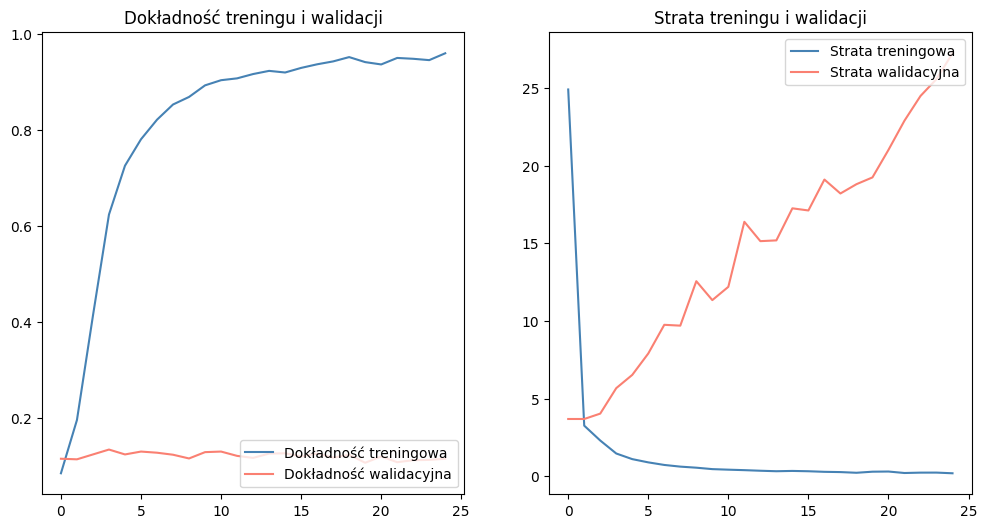

In [19]:
# Wyświetlanie wyników treningu
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))

# Wykres dokładności
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, color='steelblue', label='Dokładność treningowa')
plt.plot(epochs_range, val_acc, color='salmon', label='Dokładność walidacyjna')
plt.legend(loc='lower right')
plt.title('Dokładność treningu i walidacji')

# Wykres straty
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, color='steelblue', label='Strata treningowa')
plt.plot(epochs_range, val_loss, color='salmon', label='Strata walidacyjna')
plt.legend(loc='upper right')
plt.title('Strata treningu i walidacji')

plt.show()


In [40]:
# Uzyskanie etykiet rzeczywistych
validation_labels = validation_generator.classes

# Przewidywanie na całym zbiorze walidacyjnym
validation_preds = model.predict(validation_generator)

# Uzyskanie indeksów klas dla każdej predykcji
validation_preds = np.argmax(validation_preds, axis=1)

# Generowanie raportu klasyfikacji
report = classification_report(
    validation_labels, 
    validation_preds, 
    target_names=list(validation_generator.class_indices.keys())
)
print(report)


53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 265ms/step
                           precision    recall  f1-score   support

           Albrecht_Dürer       0.06      0.08      0.07        65
            Alfred_Sisley       0.05      0.04      0.04        51
        Amedeo_Modigliani       0.07      0.08      0.07        38
            Andrei_Rublev       0.00      0.00      0.00        19
              Andy_Warhol       0.02      0.03      0.02        36
         Camille_Pissarro       0.05      0.06      0.05        18
               Caravaggio       0.00      0.00      0.00        11
             Claude_Monet       0.00      0.00      0.00        14
             Diego_Rivera       0.00      0.00      0.00        14
          Diego_Velazquez       0.00      0.00      0.00        25
              Edgar_Degas       0.12      0.09      0.10       140
            Edouard_Manet       0.00      0.00      0.00        18
             Edvard_Munch       0.00      0.00      0.00        13
                 El

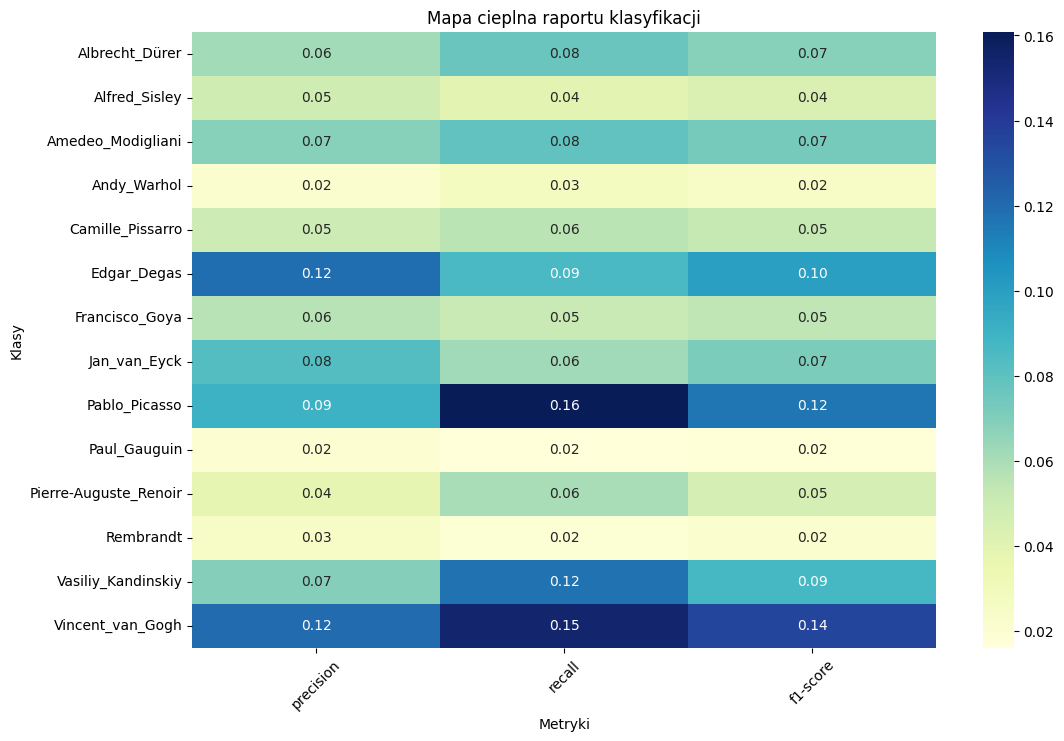

In [41]:
# Generowanie raportu klasyfikacji z output_dict=True
report2 = classification_report(validation_labels, validation_preds, target_names=validation_generator.class_indices.keys(), output_dict=True)

# Przygotowanie danych do heatmapy
report_df = pd.DataFrame(report2).transpose()

# Usunięcie wierszy 'accuracy', 'macro avg' i 'weighted avg'
report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

# Filtrowanie wierszy z zerowymi wartościami w kolumnach precision, recall lub f1-score
report_df = report_df[(report_df[['precision', 'recall', 'f1-score']] > 0).any(axis=1)]

# Wizualizacja heatmapy
plt.figure(figsize=(12, 8))
sns.heatmap(report_df[['precision', 'recall', 'f1-score']], annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Mapa cieplna raportu klasyfikacji')
plt.xlabel('Metryki')
plt.ylabel('Klasy')
plt.xticks(rotation=45)
plt.show()